In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
dataset = pd.read_csv("C:/Users/Vic/Documents/CursoMachineLearning/Dataset/Social_Network_Ads/Social_Network_Ads.csv")

In [66]:
#Promocion de un producto que se hace por redes sociales.
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [67]:
dataset.shape

(400, 5)

In [68]:
x = dataset.iloc[:,[2,3]].values #Age, EstimatedSalary
y = dataset.iloc[:,4].values #Purchased

In [69]:
pd.DataFrame(x).head(10)

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [70]:
pd.DataFrame(y).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [71]:
#PARTICION DE DATOS
#Asignacion de informacion
#En la asignacion se trabaja con los datos reales.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [72]:
#PREPROCESAMIENTO

#Escalado
#La columna EstimatedSalari es mas grande que Age.

from sklearn.preprocessing import StandardScaler

In [73]:
#El escalado casi siempre se hace en X. 
#Rara vez se ve escalado en Y.

sc_x = StandardScaler()
#Siempre fit_transform
x_train = sc_x.fit_transform(x_train)
#Ya esta fijado solo necesita ser transformado.
x_test = sc_x.transform(x_test)

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [74]:
pd.DataFrame(x_train).head(10)

,0,1
0,0.581649,-0.886707
1,-0.606738,1.461738
2,-0.012544,-0.567782
3,-0.606738,1.896635
4,1.373907,-1.408584
5,1.472940,0.997847
6,0.086488,-0.799728
7,-0.012544,-0.248858
8,-0.210609,-0.567782
9,-0.210609,-0.190872


In [75]:
pd.DataFrame(x_test).head(10)

,0,1
0,-0.804802,0.504964
1,-0.012544,-0.567782
2,-0.309641,0.157046
3,-0.804802,0.273019
4,-0.309641,-0.567782
5,-1.101899,-1.437577
6,-0.705770,-1.582542
7,-0.210609,2.157573
8,-1.993189,-0.045906
9,0.878746,-0.770734


In [76]:
#MODELO 

from sklearn.svm import SVC
#Para clasificion encontrar la mejor linea que se encargue de dividir a los usuario que compran o no.
#kernel=linear
clasificador = SVC(kernel="linear", random_state=0)
clasificador.fit(x_train,y_train) #x_train estandarizado, y_train no estandarizado

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
y_pred = clasificador.predict(x_test) #x_test estandarizado

In [78]:
#Prediccion
#Con KNN el registro 9 compraba
#Con SVM-Clasificacion el registro 9 no compra
pd.DataFrame(y_pred).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [79]:
#Datos observados
pd.DataFrame(y_test).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [80]:
#MATRIZ DE CONFUCION
#Ver la cantidad de aciertos y errores.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [81]:
#90 aciertos
#10 errores
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [82]:
#Score.
#El porcentaje de aprendizaje es mayor al 80%. La puntuacion del modelo es 90%
clasificador.score(x_test,y_test)

0.9

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


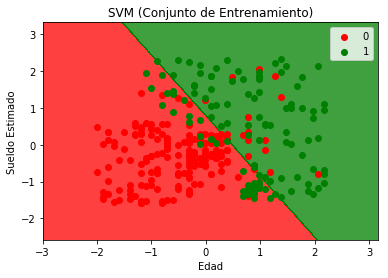

In [83]:
#GRAFICIO CON LOS DATOS DE ENTRENAMIENTO

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

#Crear dos grillas x1,x2
#Encuentra el minimo y maximo suma mas 1. Marcando la cancha con limites fuera de la cancha.
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop= x_set[:,0].max() + 1, step = 0.01), #columna 0
                     np.arange(start=x_set[:,1].min() - 1, stop= x_set[:,1].max() + 1, step = 0.01)) #columna 1

#Dibujar los contornos
#ravel aplanado de los datos.
#T transpuesta
#Reshape cambio de fila y columna
plt.contourf(x1,x2,clasificador.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

#Definir los limites de X,Y
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

#Iteracion de pertenencia a cada segmento.
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label = j)

plt.title("SVM (Conjunto de Entrenamiento)")
plt.xlabel("Edad")
plt.ylabel("Sueldo Estimado")
plt.legend()
plt.show()

#En la grafica puede que se obseven puntos en grupos diferentes.
#Cuanto mas entrenemaiento, menos errores.
#SVM-Clasificacion encuentra la mejor linea de segmentacion. Linea recto oblicua
#K-Mean la division se ajusta a los datos.
#Para este ejercio SVM ha ganado frente a KNN.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


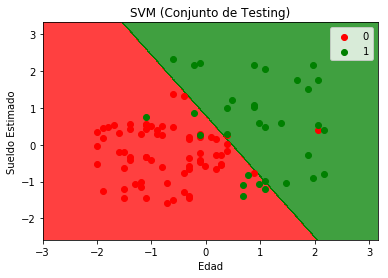

In [84]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop= x_set[:,0].max() + 1, step = 0.01),
                     np.arange(start=x_set[:,1].min() - 1, stop= x_set[:,1].max() + 1, step = 0.01))
plt.contourf(x1,x2,clasificador.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i), label = j)
plt.title("SVM (Conjunto de Testing)")
plt.xlabel("Edad")
plt.ylabel("Sueldo Estimado")
plt.legend()
plt.show()
